In [2]:
import matplotlib.pyplot as plt
import numpy as np

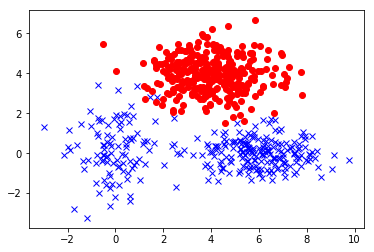

In [148]:
N1 = 100
N2 = 300
N3 = 200
mean1 = [0, 0]
cov1 = [[1, 0], [0, 2]]
mean2 = [4, 4]
cov2 = [[2,0], [0, 1]]
mean3 = [6, 0]
cov3 = [[2, 0], [0, 0.5]]
np.random.seed(10)
x1, y1 = np.random.multivariate_normal(mean1, cov1, N1).T
x2, y2 = np.random.multivariate_normal(mean2, cov2, N2).T
x3, y3 = np.random.multivariate_normal(mean3, cov3, N3).T
X1 = np.column_stack((x1, y1))
X2 = np.column_stack((x2, y2))
X3 = np.column_stack((x3, y3))
X = np.append(X1, X3, axis=0)
X = np.append(X, X2, axis=0)
T1 = np.zeros(N1 + N3)
T2 = np.ones(N2)
T = np.append(T1, T2)
plt.plot(X[0:N1+N3, 0], X[0:N1+N3,1], 'bx')
plt.plot(x2, y2, 'ro')
plt.show()

In [149]:
#Model: y = sigmoid(W * x)
def sigmoid(x):  
    return np.exp(-np.logaddexp(0, -x))
def predict(W, x):
    return sigmoid(W.T.dot(x))
def loss(T, X, W):
    result = 0
    size, dim = X.shape
    for i in range(size):
        x = np.ones(dim + 1)
        x[1:dim+1] = X[i]
        y = predict(W,x)
        result += -1 * (T[i] * np.log(y) + (1 - T[i]) * np.log(1 - y))
    return result * np.divide(1, size)
def gradient(T, X, W):
    result = np.zeros(W.size)
    size, dim = X.shape
    for i in range(size):
        x = np.ones(dim + 1)
        x[1:dim+1] = X[i]
        y = predict(W,x)
        result = np.add(result, (y - T[i]) * x)
    return result * np.divide(1, size)
def update_weight(T, X, W, learning_rate):
    return np.subtract(W, learning_rate * gradient(T, X, W))
def hessian_newton_raphson(T, X, W):
    # Hessian = sum(y(1-y)x^2)
    # return H^-1
    result = 0
    size, dim = X.shape
    for i in range(size):
        x = np.ones(dim + 1)
        x[1:dim+1] = X[i]
        y = predict(W,x)
        result += y * (1 - y) * x.dot(x.T)
    return np.divide(1, result)
def update_weight_newton_raphson(T, X, W):
    rate = hessian_newton_raphson(T, X, W)
    return update_weight(T, X, W, rate)
def initiate_weight(sigma, size):
    W = np.random.normal(0, sigma, size + 1)
    #W = np.zeros(size + 1)
    return W
def boundary(W, x):
    return -1 * np.divide(1, W[2]) * (W[1] * x + W[0])
def train(T, X, sigma, iterate_num, learning_rate):
    _, size = X.shape
    W = initiate_weight(sigma, size)
    iterates = np.arange(iterate_num)
    losses = []
    for i in range(iterate_num):
        e = loss(T, X, W)
        losses.append(e)
        if (learning_rate > 0):
            W = update_weight(T, X, W, learning_rate)
        else:
            W = update_weight_newton_raphson(T, X, W)
    loss_val = np.asarray(losses)
    return W, iterates, loss_val
def plot(T, X, W, iterates, loss_val):
    # boundary y(x) = 0.5 => sigmoid(Wx) = 0.5 => Wx = 0
    xMin = np.amin(X)
    xMax = np.amax(X)
    yMin = boundary(W, xMin)
    yMax = boundary(W, xMax)
    plt.figure(1)
    plt.subplot(211)    
    plt.plot(X[0:N1+N3, 0], X[0:N1+N3,1], 'bx')
    plt.plot(x2, y2, 'ro')
    plt.plot([xMin, xMax], [yMin, yMax])
    plt.subplot(212)
    plt.plot(iterates, loss_val)
    plt.show()

In [150]:
W, iterates, loss_val = train(T, X, 0.1, 100, 0)

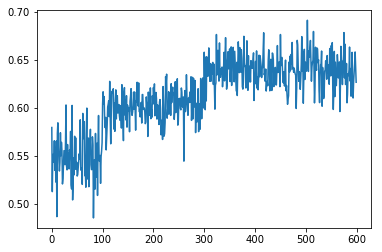

In [147]:
def make_input(x):
    size = x.size
    new_x = np.ones(size + 1)
    new_x[1:size+1] = x
    return new_x
all_points = np.arange(N1 + N2 + N3)
vals = []
for i in range(all_points.size):
    new_input = make_input(X[i])
    vals.append(predict(W, new_input))
all_vals = np.asarray(vals)
plt.plot(all_points, all_vals)
plt.show()


In [123]:
xMin = np.amin(X)
xMax = np.amax(X)
yMin = boundary(W, xMin)
yMax = boundary(W, xMax)
print(xMin)
print(xMax)

-3.24576625487
9.74864157921


In [124]:
print(yMin)
print(yMax)

-3.20547626676
-29.944105923


In [125]:
print(W)

[-3.01535915 -0.62773427 -0.30506557]


In [127]:
newX = np.array([1, xMin, yMin])
print(W.T.dot(newX))

1.11022302463e-16


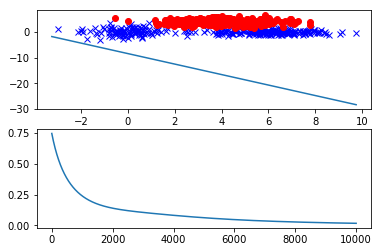

In [131]:
plot(T, X, W, iterates, loss_val)